In [1]:
# Practice Project 1 
# World Happiness Report


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('C:\ProgramData\happiness_score_dataset.csv')
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy(GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust(Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
# checking for null values in dataset

df.isnull().sum()

Country                         0
Region                          0
Happiness Rank                  0
Happiness Score                 0
Standard Error                  0
Economy(GDP per Capita)         0
Family                          0
Health (Life Expectancy)        0
Freedom                         0
Trust(Government Corruption)    0
Generosity                      0
Dystopia Residual               0
dtype: int64

In [3]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy(GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust(Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [4]:
#converting Region from categorical data to ordinal data using LabelEncoder

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Region']=LE.fit_transform(df['Region'])
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy(GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust(Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
# dropping country as it is categorical data, and dropping happiness score , happiness rank also as they are not
#relevant to the model.

x=df.drop(['Country','Happiness Score','Happiness Rank'],axis=1)
y=df["Happiness Score"]
x.head()

,Region,Standard Error,Economy(GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust(Government Corruption),Generosity,Dystopia Residual
0,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
#checking skewness
x.skew().sort_values()

Family                         -1.006893
Health (Life Expectancy)       -0.705328
Freedom                        -0.413462
Economy(GDP per Capita)        -0.317575
Dystopia Residual              -0.238911
Region                         -0.116119
Generosity                      1.001961
Trust(Government Corruption)    1.385463
Standard Error                  1.983439
dtype: float64

In [7]:
#removing skewness keeping threshold +/-0.3

from sklearn.preprocessing import power_transform
x_new=power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)

x.skew().sort_values(ascending=False)

Trust(Government Corruption)    0.185965
Dystopia Residual               0.022925
Generosity                      0.013320
Standard Error                 -0.020092
Freedom                        -0.080728
Economy(GDP per Capita)        -0.127233
Family                         -0.169651
Health (Life Expectancy)       -0.183181
Region                         -0.228041
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

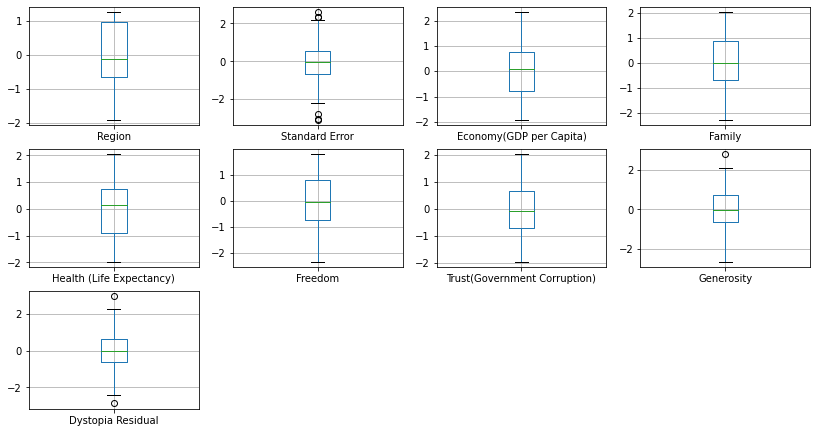

In [8]:
# checking outliers in features

x.plot(kind='box', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show

In [9]:
# Not much outlier could be seen in features except for generosity

In [10]:
# Analysing Generosity variable through distribution plot,box plot 

Text(0.5, 1.0, 'Region Vs HAPPINESS SCORE')

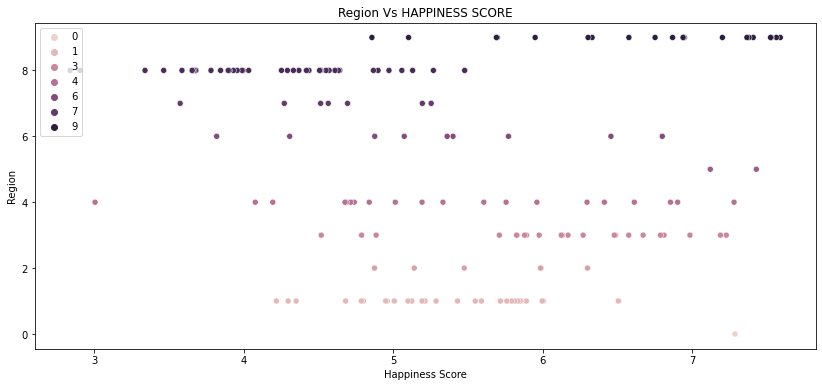

In [11]:
plt.figure(figsize=(14,6))
sns.scatterplot(y=df['Region'],x=df['Happiness Score'],hue=df['Region'])
plt.legend(loc='upper left')
plt.title('Region Vs HAPPINESS SCORE')

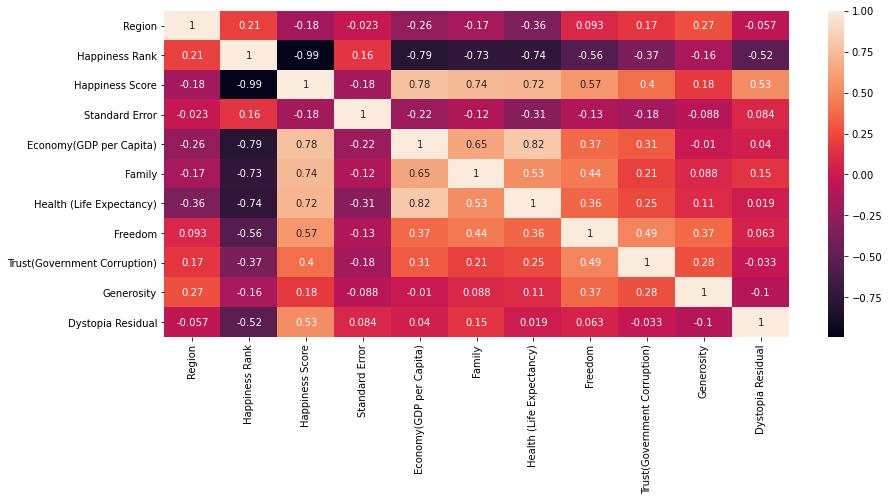

In [12]:
#Checking correlation of features with happiness score

plt.figure(figsize=(14,6))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [13]:
corr_matrix['Happiness Score'].sort_values(ascending = False)

Happiness Score                 1.000000
Economy(GDP per Capita)         0.780966
Family                          0.740605
Health (Life Expectancy)        0.724200
Freedom                         0.568211
Dystopia Residual               0.530474
Trust(Government Corruption)    0.395199
Generosity                      0.180319
Region                         -0.176791
Standard Error                 -0.177254
Happiness Rank                 -0.992105
Name: Happiness Score, dtype: float64

In [14]:
#Above data clearly shows that Economy(GDP per Capita),Family,Health(Life Expectancy),Freedom are most correlated to happiness score
#and Trust(Government Corruption),Generosity are least correlated to happiness score

In [15]:
# Scaling the dataset

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [16]:

# splitting data into training and test data using Train_test_split



In [17]:
# Training the model using LinearRegression and evaluating the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.model_selection import train_test_split

lr= LinearRegression()

score_s=0
state=0
for i in range(0,500):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state =i)
    lr.fit(X_train, y_train)
    y_pred_lr =lr.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred_lr))
    if rmse>score_s:
        score_s=rmse
        state=i
        
print('best random_state : ',state)
print('best root mean square error  : ',score_s)

best random_state :  67
best root mean square error  :  0.1574152213262459


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state =67)
lr.fit(X_train, y_train)
y_pred_lr =lr.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lr))

print('best root mean square error  : ',rmse)

best root mean square error  :  0.1574152213262459


In [22]:
# Conclusion:

import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com

,original,predcited
0,5.548,5.510707
1,7.378,7.320117
2,5.399,5.158559
3,7.226,7.365225
4,4.633,4.573214
5,6.940,6.964796
6,4.507,4.634432
7,4.514,4.394686
8,3.678,4.285839
9,4.512,4.529086


In [23]:
#Model Evaluation

#Using Root Mean Squared Error to evaluate the model

import numpy as np 
from sklearn.metrics import mean_squared_error as MSE

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred_lr)))

Root Mean Squared Error: 0.1574152213262459
